##Introduction

####In this project we investigate a dataset which focuses on different types of cosmetics and their ingredients, ranking prices as well according to the affect skin. This dataset, which is obtained from Kaggle, includes a variety of cosmetic products and their chemical compounds so that we can gain an in-depth analysis on the ingredients present and how they affect skin beauty.

##Dataset Overview

###Key Features of the Dataset

####Items — This column details the ingredients in every cosmetic product. It is really important to know what this product contains so as an ingredient cog it will definitely be helpful for me to write up about the formulation of the product and how much affective on my skin!

####Rank This will rank the cosmetics based on whatever, maybe user reviews or performance etc. It gives you a good idea of which products are popular or perceived as quality.

####Cost: The cost of individual product in on the basis for consumer perception and then build correlation around with effectiveness/popularity.

####Effects on Skin: This column describes about the effects which can happen or expected to occur with cosmetic products that affect skin. These effects might include anything from moisturizing and anti-aging to potential side effects such as irritation or allergic reactions.

##Objective

####In this analysis, the main object of focus is to employ t-Distributed Stochastic Neighbor Embedding (t-SNE) algorithm for visualizing how cosmetics are related with each other regarding their ingredients,rank, price and skin effects. t-SNE is an complex and powerful dimensionality reduction technique that will allow us to map high-dimensional data into a lower dimensional space,making it easier to observe clusters, patterns, and outliers within the dataset.

##Significance
####Understanding the relationship between cosmetic ingredients, their cost, and their effects on the skin can provide valuable insights for both consumers and manufacturers. Consumers can make more informed choices based on data-driven evidence, while manufacturers can identify trends and gaps in the market to improve their product offerings.

####By applying t-SNE, we aim to uncover hidden patterns in the data that might not be immediately apparent through traditional analysis techniques. This visualization will aid in identifying clusters of similar products, potential outliers, and any correlations between the price and effectiveness of cosmetics.

###Source:
https://www.kaggle.com/datasets/kingabzpro/cosmetics-datasets/data

#Importing Necessary Libraries

###We are required to importing the libraries so as to performing EDA. These include NumPy, Pandas

In [1]:
!pip install bioinfokit


In [2]:
import pandas as pd # Pandas is a powerful library for data manipulation and analysis.
import numpy as np # NumPy is a powerful tool for numerical computations in Python

from sklearn.manifold import TSNE #Imports the TSNE class from sklearn.manifold for dimensionality reduction.
from bioinfokit.visuz import cluster #The cluster module from bioinfokit.visuz for visualizing clustering results.

##Loading the Dataset

In [3]:
df = pd.read_csv('cosmetics.csv') #The df = pd.read_csv line reads a CSV file into a DataFrame named df using the pandas library.

In [4]:
df.head() #We will now read the data from a CSV file into a Pandas DataFrame Let us have a look at how our dataset looks like using df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [5]:
df.columns #Displays the names of the columns

Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')

In [6]:
df.shape # Displays the total count of the Rows and Columns respectively.

(1472, 11)

In [7]:
df.isnull().sum() #Displays the total count of the null values in the particular columns.

,0
Label,0
Brand,0
Name,0
Price,0
Rank,0
Ingredients,0
Combination,0
Dry,0
Normal,0
Oily,0


###There is no null or missing value in the dataset.

In [8]:
df.info() #Displays the total count of values present in the particular column along with the null count and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [9]:
df[df.duplicated()] #This code returns the count of duplicate rows in the DataFrame df.

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive


###As we can see that there is no duplicate value in the dataset.

##Featuring Engineering
Feature engineering is the process of selecting, transforming, and creating features (variables) that will be used as input for a machine learning model. In this case, we are selecting the features we believe are most relevant for visualizing the relationships between cosmetics using t-SNE


In [10]:
# Selecting relevant columns for t-SNE
features = df[['Price', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]

###We are creating a new DataFrame called features by selecting specific columns from the original DataFrame df.

##Reasoning:

###This is done because we want to focus your t-SNE analysis on the relationship between these specific features.

## Normalize the features
### Standardization ensures that all features have a similar scale (mean of 0 and standard deviation of 1), preventing any single feature from having an outsized influence

In [ ]:
from sklearn.preprocessing import StandardScaler
features_scaled = StandardScaler().fit_transform(features)
#This line imports the StandardScaler class from the sklearn.preprocessing module. This class is a tool for standardizing features.

## Applying t-SNE

###n_components=2: This tells t-SNE to reduce the dimensionality of our data to 2 dimensions. This is common for visualization purposes, as it allows us to plot the results on a 2D scatter plot.

###random_state=42: This sets a random seed for reproducibility. Using a fixed random state ensures that if we run the code again, we'll get the same results (t-SNE can have some randomness in its output).


In [11]:
# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42) #This line initializes a t-SNE object with specific parameters
tsne_results = tsne.fit_transform(features_scaled) #This line performs the actual t-SNE dimensionality reduction.


###fit_transform(features_scaled): This method applies the t-SNE algorithm to the standardized features (features_scaled). It learns the relationships between the data points in the high-dimensional space and maps them to a lower-dimensional space (in this case, 2 dimensions).

###tsne_results = ...: The results of the t-SNE transformation (the coordinates of the data points in the 2D space) are stored in a variable called tsne_results.

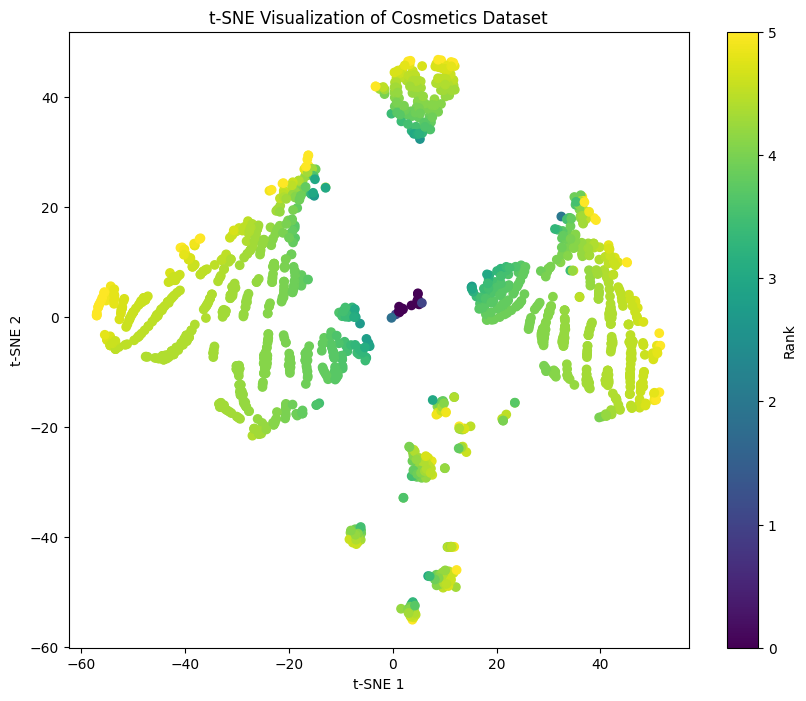

In [12]:
import matplotlib.pyplot as plt

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['Rank'], cmap='viridis')
plt.colorbar(label='Rank')
plt.title('t-SNE Visualization of Cosmetics Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


This code takes the 2D coordinates generated by t-SNE and creates a scatter plot where each point represents a cosmetic product, colored according to its rank. This visualization allows you to explore the relationships and potential clusters within the dataset.